In [59]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [8]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [53]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
jun_temp = []
jun_temp = session.query(Measurement).filter(func.extract('month',Measurement.date) ==6)
jun_temp

In [27]:
#TABLE LAYOUT
#| ID | Station | DATE | PRCP | TOBS |
#|---|---------|------|------|------|

In [42]:
#  3. Convert the June temperatures to a list.
jun_list = [temp.tobs for temp in jun_temp]
jun_list

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [38]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(jun_list)
june_df

,0
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [39]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.rename(columns={0: "June Temps"}).describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [48]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = []
dec_temp = session.query(Measurement).filter(func.extract('month',Measurement.date) ==12)

In [49]:
# 7. Convert the December temperatures to a list.
dec_list = [temp.tobs for temp in dec_temp]
dec_list

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [50]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_list)
dec_df

,0
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [51]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.rename(columns={0: "December Temps"}).describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

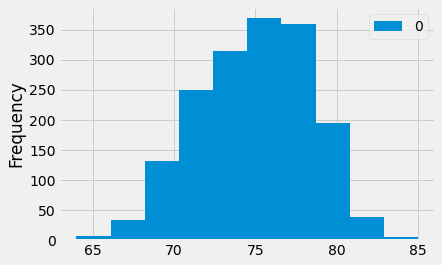

In [60]:
june_df.plot.hist(bins=10)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

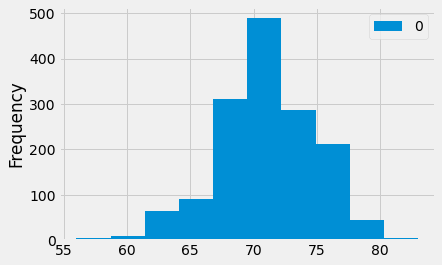

In [63]:
dec_df.plot.hist(bins=10)
plt.tight_layout

In [66]:
jun_p_list = [prcp.prcp for prcp in jun_temp]
jun_p_list

[0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.56,
 0.89,
 0.0,
 0.0,
 0.0,
 0.03,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.06,
 0.07,
 None,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.02,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.15,
 0.01,
 0.0,
 0.05,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.37,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.12,
 0.04,
 0.02,
 0.35,
 0.03,
 0.01,
 0.0,
 0.0,
 0.03,
 0.01,
 0.0,
 0.66,
 0.01,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.03,
 0.15,
 0.01,
 0.07,
 0.01,
 0.01,
 0.19,
 0.0,
 0.05,
 0.06,
 0.04,
 0.0,
 0.01,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [67]:
jun_p_df = pd.DataFrame(jun_p_list)
jun_p_df

,0
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

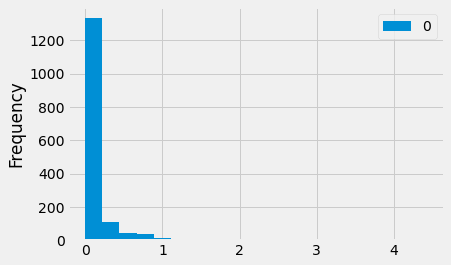

In [70]:
jun_p_df.plot.hist(bins=20)
plt.tight_layout

In [71]:
dec_p_list = [prcp.prcp for prcp in dec_temp]
dec_p_list

[0.04,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.58,
 0.77,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.4,
 0.0,
 0.0,
 None,
 0.13,
 0.55,
 0.06,
 0.01,
 0.0,
 0.03,
 0.08,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13,
 0.07,
 0.07,
 0.08,
 0.4,
 0.7,
 0.0,
 0.01,
 0.07,
 0.02,
 0.15,
 0.02,
 0.18,
 0.03,
 0.04,
 0.1,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.2,
 0.01,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14,
 0.09,
 0.01,
 0.02,
 0.02,
 0.12,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 0.0,
 2.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 1.1,
 0.02,
 0.0,
 0.16,
 0.09,
 0.02,
 0.0,
 0.0,
 0.05,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.15,
 0.09,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.01,
 0.0,
 0.03,
 0.02,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.93,
 0.04,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.06,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [72]:
dec_p_df = pd.DataFrame(dec_p_list)
dec_p_df

,0
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

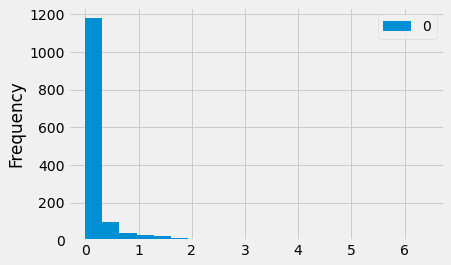

In [73]:
dec_p_df.plot.hist(bins=20)
plt.tight_layout